In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
#--- Web scriping ---
import requests
from bs4 import BeautifulSoup
#--- ------------ ---
from datetime import datetime, date, timedelta
#from googletrans import Translator 

# <font style="font-size: 80px"><font color="yellow">C</font><font style="color: whitesmoke">onsume </font><font color="yellow">P</font><font style="color: whitesmoke">roduct </font><font color="yellow">I</font><font style="color: whitesmoke">ndex </font>(<font color="yellow">CPI</font>)</font>

### Getting data

In [2]:
url = 'https://thedocs.worldbank.org/en/doc/1ad246272dbbc437c74323719506aa0c-0350012021/original/Inflation-data.xlsx'
local_path = 'InflationWorldData.xlsx'

try: 
    response = requests.get(url)

    if(response.status_code == 200):
        with open(local_path, 'wb') as file:
            file.write(response.content)
        print(f'Download success, status code {response.status_code}')
    else:
        print(f'Download Error, status code {response.status_code}')
except: 
    pass

Download success, status code 200


In [3]:
excel = "InflationWorldData.xlsx"
sheets = openpyxl.load_workbook(excel) #https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG

In [4]:
print(sheets.sheetnames)

['Intro', 'top', 'hcpi_m', 'hcpi_q', 'hcpi_a', 'ecpi_m', 'ecpi_q', 'ecpi_a', 'fcpi_m', 'fcpi_q', 'fcpi_a', 'ccpi_m', 'ccpi_q', 'ccpi_a', 'ppi_m', 'ppi_q', 'ppi_a', 'def_q', 'def_a', 'Aggregate']


In [5]:
CPIa = pd.read_excel(excel, sheet_name="hcpi_a")

---

### <font style="color: yellow">Columns</font>

In [6]:
CPIa.drop(columns=["Note", "IMF Country Code", "Indicator Type", "Series Name"], inplace=True)
CPIa.rename(columns={"Country Code":"Code"}, inplace=True)
CPIa[["Code", "Country"]] = CPIa[["Country", "Code"]]
CPIa.rename(columns={"Code":"Country", "Country":"Code"}, inplace=True) #If the name not exist previously to the function are not changed

In [7]:
CPIa.columns = CPIa.columns.astype(str)

In [8]:
len(CPIa["Country"])

205

In [9]:
countryCount = {}
for i in CPIa["Country"]:
    if countryCount.get(i):
        countryCount[i] += 1
    else:
        countryCount[i] = 1

country_repeat = {k: v for k, v in countryCount.items() if(v>=2)}
print(country_repeat)

{nan: 2}


In [10]:
CPIa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  203 non-null    object 
 1   Code     204 non-null    object 
 2   1970     155 non-null    float64
 3   1971     155 non-null    float64
 4   1972     155 non-null    float64
 5   1973     156 non-null    float64
 6   1974     156 non-null    float64
 7   1975     154 non-null    float64
 8   1976     154 non-null    float64
 9   1977     154 non-null    float64
 10  1978     155 non-null    float64
 11  1979     155 non-null    float64
 12  1980     158 non-null    float64
 13  1981     162 non-null    float64
 14  1982     163 non-null    float64
 15  1983     163 non-null    float64
 16  1984     163 non-null    float64
 17  1985     163 non-null    float64
 18  1986     164 non-null    float64
 19  1987     165 non-null    float64
 20  1988     165 non-null    float64
 21  1989     165 non

---

### <font style="color: yellow"> This data-frame have something wrong elements? </font>

In [11]:
nanCountry = CPIa[CPIa["Country"].isna() == True]
CPIa.drop(index=nanCountry.index, inplace=True)
CPIa.reset_index(inplace=True, drop=True)

In [12]:
#CPIa.loc[CPIa["Country"] == "Angola", "1970"] = "Hello"
aux = CPIa.iloc[:, 2:]
dataFilter = aux.select_dtypes(exclude=["float"]).any()
dataFilter

Series([], dtype: bool)

---

### <font style="color: yellow"> Sorting the data </font>

In [13]:
nanPorcent = {}
noData = []
for i in CPIa["Country"]:
    rowSelected = CPIa[CPIa["Country"] == i]
    if(rowSelected.isna().any().any()):
        nanPorcent[i] = rowSelected.iloc[:, 2:].isna().any().value_counts(normalize=True)[True]
        if(nanPorcent[i] == 1):
            noData.append(int(rowSelected.index.values[0]))
    else:
        nanPorcent[i] = 0.0

print(nanPorcent, "\n", noData)

#--- Del data ---#
for i in range(0, len(noData)):
    del nanPorcent[CPIa.iloc[noData[i]]["Country"]]
CPIa.drop(index=noData, inplace=True)
CPIa.reset_index(inplace=True, drop=True)

{'Afghanistan': 0.018518518518518517, 'Albania': 0.37037037037037035, 'Algeria': 0.0, 'Angola': 0.0, 'Antigua and Barbuda': 0.0, 'Argentina': 0.0, 'Armenia': 0.42592592592592593, 'Aruba': 0.48148148148148145, 'Australia': 0.0, 'Austria': 0.0, 'Azerbaijan': 0.3888888888888889, 'Bahamas, The': 0.0, 'Bahrain': 0.0, 'Bangladesh': 0.0, 'Barbados': 0.0, 'Belarus': 0.0, 'Belgium': 0.0, 'Belize': 0.0, 'Benin': 0.0, 'Bhutan': 0.05555555555555555, 'Bolivia': 0.0, 'Bosnia and Herzegovina': 0.46296296296296297, 'Botswana': 0.0, 'Brazil': 0.0, 'British Virgin Islands': 0.8333333333333334, 'Brunei Darussalam': 0.0, 'Bulgaria': 0.0, 'Burkina Faso': 0.0, 'Burundi': 0.0, 'Cabo Verde': 0.0, 'Cambodia': 0.2222222222222222, 'Cameroon': 0.0, 'Canada': 0.0, 'Cayman Islands': 0.5, 'Central African Republic': 0.0, 'Chad': 0.0, 'Chile': 0.0, 'China': 0.0, 'Colombia': 0.0, 'Comoros': 0.0, 'Congo, Dem. Rep.': 0.0, 'Congo, Rep.': 0.0, 'Costa Rica': 0.0, "Côte d'Ivoire": 0.0, 'Croatia': 0.2037037037037037, 'Curaca

In [14]:
nanPorcent = dict(sorted(nanPorcent.items(), key=lambda items: items[1], reverse=False))
newOrder = [x for x in nanPorcent]
aux_df = pd.DataFrame(columns=CPIa.columns)

for i in newOrder:
    rowSelected = CPIa[CPIa["Country"] == i]
    aux_df = pd.concat([aux_df, rowSelected], ignore_index=True)

aux_df = aux_df.round(2)
CPIa =  aux_df
CPIa

/var/folders/r3/_0ct4tcx0jj4q9jfbhwjb93m0000gn/T/ipykernel_2165/1748395857.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aux_df = pd.concat([aux_df, rowSelected], ignore_index=True)


,Country,Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Algeria,DZA,6.60,2.63,3.66,6.17,4.70,8.23,9.43,11.99,...,3.88,4.39,5.80,5.59,3.51,1.95,2.42,7.23,9.27,9.32
1,Angola,AGO,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,...,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,23.83,13.64
2,Antigua and Barbuda,ATG,8.87,8.63,12.67,21.72,12.97,8.61,15.62,13.75,...,1.09,0.97,-0.49,2.42,1.21,1.48,1.06,1.63,7.53,5.07
3,Argentina,ARG,13.59,34.73,58.45,61.25,23.47,182.93,443.97,176.00,...,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43,128.41
4,Australia,AUS,3.44,6.14,6.02,9.09,15.42,15.16,13.32,12.31,...,2.49,1.51,1.28,1.97,1.91,1.61,0.85,2.82,6.59,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Liechtenstein,LIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,-1.11,-0.41,0.51,0.92,0.40,-0.70,0.51,8.40,6.35
199,South Sudan,SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.66,52.81,379.85,187.87,83.49,51.19,29.68,30.23,-6.69,2.38
200,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,0.80,1.10,1.20,2.10,1.40,0.40,2.80,NaN,NaN
201,Martinique,MTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.07,NaN


---

# <font>Argentina compare between <font style="color: yellow">worlddata.info</font> and <font style="color: yellow">data.worldbank.org</font></font>

In [15]:
argentinaInf1 = CPIa[CPIa["Country"] == "Argentina"]

#************ WEB scriping ************#
try: 
    url = "https://www.datosmundial.com/america/argentina/inflacion.php" #English: "https://www.worlddata.info/america/argentina/inflation-rates.php" Spanish: "https://www.datosmundial.com/america/argentina/inflacion.php"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    #Save html page
    with open('argentinaInflation.html', 'w') as file:
        file.write(soup.prettify())
    print("Success")
except:
    print('Page not abailable')
    print('No internet for get the page.\nUse downloaded html page.')
    pass

Success


In [16]:
tr_items = soup.find_all('div', class_="tablescroller")[0].find_all('td')
print(tr_items)

[<td>2024</td>, <td>229,80 %</td>, <td>2,60 %</td>, <td>3,00 %</td>, <td>5,80 %</td>, <td>2023</td>, <td>133,50 %</td>, <td>6,30 %</td>, <td>4,10 %</td>, <td>6,70 %</td>, <td>2022</td>, <td>72,40 %</td>, <td>9,30 %</td>, <td>8,00 %</td>, <td>8,60 %</td>, <td>2021</td>, <td>48,40 %</td>, <td>2,90 %</td>, <td>4,70 %</td>, <td>4,70 %</td>, <td>2020</td>, <td>42,00 %</td>, <td>0,70 %</td>, <td>1,20 %</td>, <td>3,30 %</td>, <td>2019</td>, <td>53,50 %</td>, <td>1,40 %</td>, <td>1,80 %</td>, <td>3,50 %</td>, <td>2018</td>, <td>34,30 %</td>, <td>1,90 %</td>, <td>2,40 %</td>, <td>3,60 %</td>, <td>2017</td>, <td>25,70 %</td>, <td>1,60 %</td>, <td>2,10 %</td>, <td>3,20 %</td>, <td>2016</td>, <td>26,50 %</td>, <td>0,10 %</td>, <td>1,30 %</td>, <td>2,70 %</td>, <td>2014</td>, <td>23,90 %</td>, <td>0,40 %</td>, <td>1,60 %</td>, <td>3,20 %</td>, <td>2013</td>, <td>10,60 %</td>, <td>1,40 %</td>, <td>1,50 %</td>, <td>3,50 %</td>, <td>2012</td>, <td>10,00 %</td>, <td>2,60 %</td>, <td>2,10 %</td>, <td>4,

In [17]:
Argentina_data = {}

argYear = 1
argData = 2
yearActual = ""
for i in tr_items:
    argYear -= 1
    argData -= 1
    
    if(argYear == 0):
        Argentina_data[i.text] = 1
        yearActual = i.text    
        argYear = 5

    if(argData == 0):
        Argentina_data[yearActual] = i.text
        argData = 5
    
    else:
        pass
print(Argentina_data)

for k, v in Argentina_data.items():
    Argentina_data[k] = float(v.split("%")[0].replace(".", "").replace(",", ".").strip()) #How to chage "2.313,96 and 3079.81"
print(Argentina_data)

{'2024': '229,80 %', '2023': '133,50 %', '2022': '72,40 %', '2021': '48,40 %', '2020': '42,00 %', '2019': '53,50 %', '2018': '34,30 %', '2017': '25,70 %', '2016': '26,50 %', '2014': '23,90 %', '2013': '10,60 %', '2012': '10,00 %', '2011': '9,80 %', '2010': '10,50 %', '2009': '6,30 %', '2008': '8,60 %', '2007': '8,80 %', '2006': '10,90 %', '2005': '9,60 %', '2004': '4,40 %', '2003': '13,40 %', '2002': '25,90 %', '2001': '-1,10 %', '2000': '-0,90 %', '1999': '-1,20 %', '1998': '0,90 %', '1997': '0,53 %', '1996': '0,16 %', '1995': '3,38 %', '1994': '4,18 %', '1993': '10,61 %', '1992': '24,90 %', '1991': '171,67 %', '1990': '2.313,96 %', '1989': '3.079,81 %', '1988': '342,96 %', '1987': '131,33 %', '1986': '90,10 %', '1985': '672,18 %', '1984': '626,72 %', '1983': '343,81 %', '1982': '164,78 %', '1981': '104,48 %', '1980': '100,76 %'}
{'2024': 229.8, '2023': 133.5, '2022': 72.4, '2021': 48.4, '2020': 42.0, '2019': 53.5, '2018': 34.3, '2017': 25.7, '2016': 26.5, '2014': 23.9, '2013': 10.6, 

In [18]:
argWD = pd.DataFrame([Argentina_data])
argWD["Code"] = "ARG"
argWD["Country"] = "Argentina"
print(argWD)
invert_columns = argWD.columns[: :-1] # sorted(newRow.columns, reverse=True)
newRow = argWD.reindex(columns = invert_columns)
newRow

    2024   2023  2022  2021  2020  2019  2018  2017  2016  2014  ...    1987  \
0  229.8  133.5  72.4  48.4  42.0  53.5  34.3  25.7  26.5  23.9  ...  131.33   

   1986    1985    1984    1983    1982    1981    1980  Code    Country  
0  90.1  672.18  626.72  343.81  164.78  104.48  100.76   ARG  Argentina  

[1 rows x 46 columns]


,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2014,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Argentina,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,23.9,26.5,25.7,34.3,53.5,42.0,48.4,72.4,133.5,229.8


In [19]:
for counted, year in zip(range(1980, 2022), argWD.iloc[:, 2:]):
    if(counted == int(year)):
        pass
    else:
        print(counted, " nan")
        break

1980  nan


In [20]:
newColumnName = '2015'
newColumnData = (argWD.loc[:, '2014'].values[0] + argWD.loc[:, '2016'].values[0])/2 #New column will have a avarage between 2014 and 2016
newColumnPosition = argWD.columns.get_loc('2014') + 1

print(newColumnName, newColumnData, newColumnPosition)

2015 25.2 10


In [21]:
argWD.insert(newColumnPosition, newColumnName, newColumnData)
argWD

,2024,2023,2022,2021,2020,2019,2018,2017,2016,2014,...,1987,1986,1985,1984,1983,1982,1981,1980,Code,Country
0,229.8,133.5,72.4,48.4,42.0,53.5,34.3,25.7,26.5,23.9,...,131.33,90.1,672.18,626.72,343.81,164.78,104.48,100.76,ARG,Argentina


<font style="font-size: 50px; color: yellow">Comparation</font>

In [22]:
argWB = CPIa[CPIa['Country'] == "Argentina"]
argWB = argWB.iloc[:, :2].join(argWB.iloc[:, 12:])

Argentinas = pd.concat([argWB, argWD], ignore_index=True)
Argentinas["Country"][0] = "ArgentinaWB"
Argentinas["Country"][1] = "ArgentinaWD"
Argentinas

/var/folders/r3/_0ct4tcx0jj4q9jfbhwjb93m0000gn/T/ipykernel_2165/2029232322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Argentinas["Country"][0] = "ArgentinaWB"
/var/folders/r3/_0ct4tcx0jj4q9jfbhwjb93m0000gn/T/ipykernel_2165/2029232322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Argentinas["Country"][1] = "ArgentinaWD"


,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ArgentinaWB,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,26.54,39.4,25.68,34.28,53.55,42.02,48.41,72.43,128.41,NaN
1,ArgentinaWD,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,25.20,26.5,25.70,34.30,53.50,42.00,48.40,72.40,133.50,229.8


In [23]:
#ArgentinasTransposed = Argentinas.set_index('Country').T
#ArgentinasTransposed

## Graphic

In [24]:
#ArgentinasTransposed = Argentinas.set_index('')

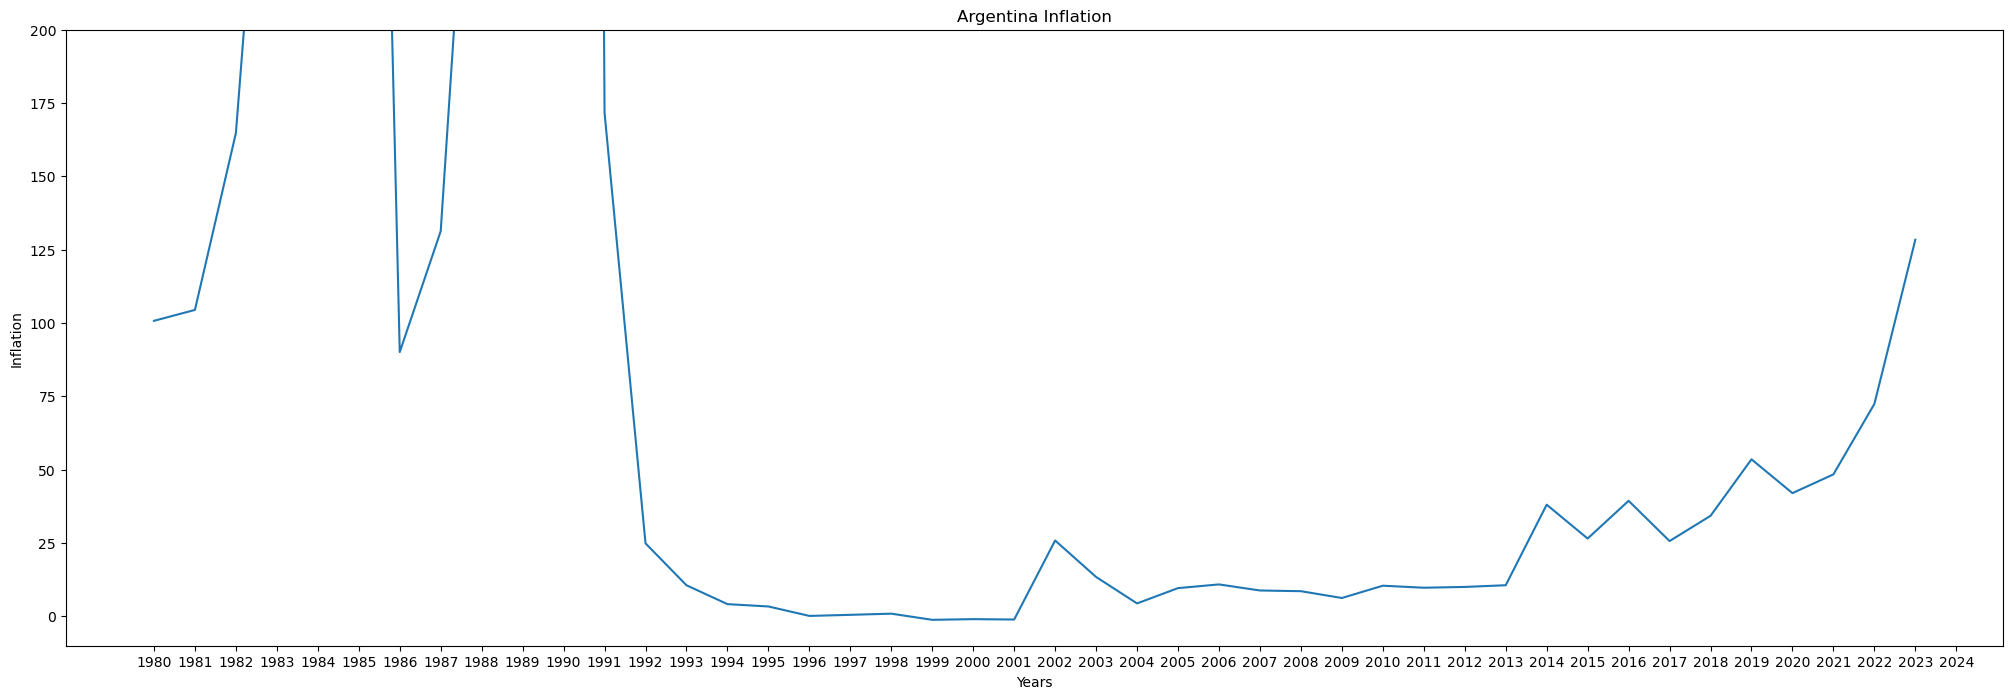

     1982    1983    1984    1985  1986
0  164.78  343.81  626.72  672.18  90.1
1  164.78  343.81  626.72  672.18  90.1 

0    131.33
1    131.33
Name: 1987, dtype: float64 

     1988     1989     1990    1991
0  342.95  3079.81  2313.96  171.67
1  342.96  3079.81  2313.96  171.67


In [25]:
plt.figure(figsize=(25, 8))

plt.plot(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])
plt.plot()

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=200)

plt.title("Argentina Inflation")

plt.show()

print(Argentinas.loc[:, '1982': '1986'], '\n')
print(Argentinas.loc[:, '1987'], '\n')
print(Argentinas.loc[:, '1988': '1991'])

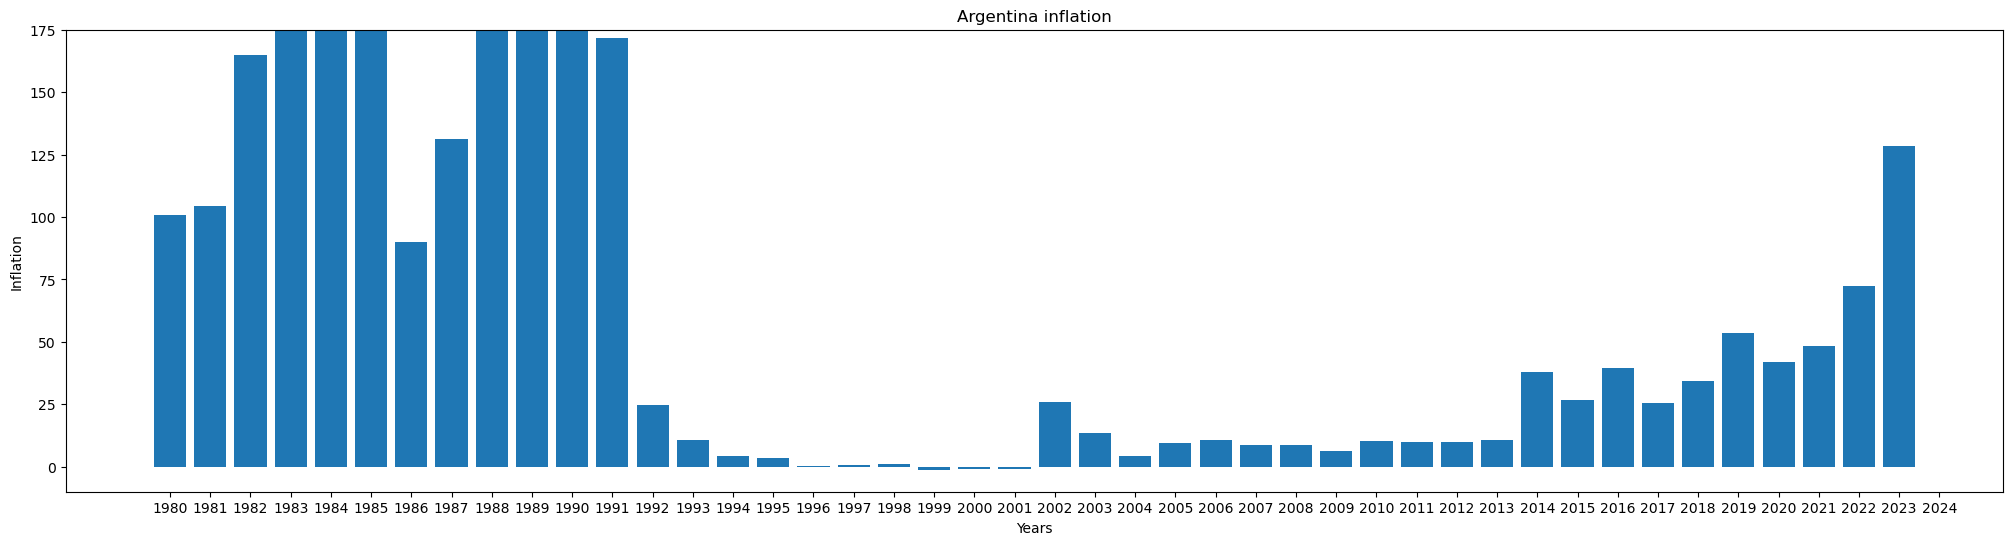

In [26]:
plt.figure(figsize=(25, 6))

plt.bar(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=175)

plt.title("Argentina inflation")

plt.show()

---

<font style="color: green; font-size: 35px">Save changes</font>

In [27]:
print(CPIa.columns)
CPIa.to_csv("Inflation_clean.csv", index=False)

Index(['Country', 'Code', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


<p style="text-align: center; font-size: 45px; color: Skyblue;">SQL</p>

In [28]:
import sqlite3
import psycopg2
from SQL_functions import *

<p style='font-size: 25px; text-align: center; color: skyblue;'>SQLite3</p>

<p style='font-size: 25px; text-align: center; color: violet;'>Crear, eliminar, actualizar y backup base de datos</p>

In [ ]:
#create_database()

#delete_database()
#delete_data()

#backup("../Inflation.db")

#update_data("Inflation_clean.csv")

---
---
---

<p style='font-size: 25px; text-align: center; color: skyblue;'>PostgreSQL</p>

<p style='font-size: 25px; text-align: center; color: violet;'>actualizar</p>

In [30]:
#update_data_postgre("Inflation_clean.csv")